 # TP6: Apprentissage profond(Deep learning)
 ## TP6.3 Un réseau MLP  : Régression logistique  
 Dans ce TP, on reprendra les mêmes notions que les TP 6.1 et 6.2 que nous appliquerons à un problème de classification.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [7]:
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    # Define the true positives, false positives and false negatives
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))

    # Calculate the precision and recall
    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    # Calculate the F1 score
    f1_score = 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    return f1_score

## Réseau de neurones avec une sortie sigmoide  sigmoïde
La fonction implémentée par un neurone/unité avec une activation sigmoïde est la même que dans le chapitre 3, la régression logistique :
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
où $$ f_{\mathbf{g(x) = sigmoïde(x) }$$


### 1 Le DataSet
On utilisera le Dataset titanic, on fera de la classification

In [8]:
# le dataset titanic
import pandas as pd
titanic = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanic.csv')

# On prend juste une partie du fichier.
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age']]
#  on regrade les chance de Survived  en fonction des autres features.
X_features=['Pclass', 'Sex', 'Age']
titanic.dropna(axis=0, inplace=True)
titanic['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

y = titanic['Survived'] # récupérer la colonne survived et la mettre dans y

# récuperer le reste des données dans X utiliser la fonction titanic.drop ???, ??? )
X = titanic.drop('Survived', axis=1)



## 2 Préparation des données

#### 2.1. Split des données (on fait du 80%, 20%)

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 2.2  Normalisation des données

In [10]:
## On peut utuliser une simple normalisation (x-mu)/ecart type)
mean = X_train.mean()
std  = X_train.std()
X_train = (X_train - mean) / std
X_test  = (X_test  - mean) / std

#display(X_train.describe().style.format("{0:.2f}").set_caption("After normalization :"))
display(X_test.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))


### 3. Définition du modèle de régression linaire
La fonction mise en œuvre par un neurone sans activation est la même que la régression logistique du chapire 3.:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
où $$  g(x) = sigmoïd(x) $$


Choix des fonctions du modèles
- [Optimizer:](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers )
- [Activation:](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
- [Loss :](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
- [Metrics :](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)
    


`model.summary()` indique les couches et le nombre de paramètres du modèle.

### 3.1 Un réseau  à 1 neurone.

Un réseau à un neurone, la sortie dans ce cas est une sigmoïde car o est dans un problème de classification

In [11]:
# Option 1
m = X_train.shape[1]
model = tf.keras.Sequential ([
        tf.keras.layers.Input(m, name="InputLayer"),
        tf.keras.layers.Dense(units=1, activation = 'sigmoid',name='output')
])


In [12]:
#Compiler le modèle
model.compile(optimizer='adam',
              loss= 'BinaryCrossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3.2 Un modèle plus complexe
#### Question : construire un modèle ayant l'architecture suivante ?
- une couche d'entrée
- une couche cachée à 32 neuronesavec une activation relu
- une couche de sortie

In [13]:
# Option 1 : Une autre façon de construire un réseau
m = X_train.shape[1]
model = tf.keras.Sequential ([
        tf.keras.layers.Input(m, name="InputLayer"),
        tf.keras.layers.Dense(units=32, activation = 'sigmoid',name='cachee'),
        tf.keras.layers.Dense(units=1, activation = 'sigmoid',name='output')
])


In [14]:
#Compiler le modèle
model.compile(optimizer='adam',
              loss= 'BinaryCrossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cachee (Dense)              (None, 32)                128       
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### On peut visualiser les paramètres du réseau les W1 et b.

In [15]:
W1, b1 = model.get_layer("output").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)


W1(32, 1):
 [[ 0.1737147 ]
 [-0.1376507 ]
 [-0.09572759]
 [ 0.35004085]
 [-0.36186954]
 [-0.36811128]
 [ 0.12525666]
 [ 0.2154581 ]
 [ 0.2817852 ]
 [-0.1686945 ]
 [-0.3821188 ]
 [ 0.323106  ]
 [-0.23674941]
 [ 0.18243486]
 [ 0.25835025]
 [-0.17495567]
 [-0.29392964]
 [ 0.29016215]
 [ 0.11458153]
 [ 0.26272374]
 [ 0.25126165]
 [-0.13435957]
 [-0.37571162]
 [-0.02176818]
 [ 0.07040837]
 [ 0.36822444]
 [-0.2862589 ]
 [-0.3828295 ]
 [ 0.3682909 ]
 [ 0.15302461]
 [-0.39201283]
 [ 0.38814652]] 
b1(1,): [0.]


### 4. Entrainement du modèle (Model training)

In [16]:
# Entrainement du modele

history  = model.fit(X_train,
                     y_train,
                     epochs=100,
                     batch_size= 10,
                     verbose=False,
                     validation_data = (X_test, y_test))



print (model.metrics_names)

['loss', 'accuracy']


#### Vislauliser les métriques utilisées lors de l'apprentissage

In [17]:
model.get_weights()


[array([[ 0.02481297,  0.81618243,  0.90712774, -0.5790057 ,  0.77883714,
          0.63048315, -0.19756739, -0.12269713, -0.81884587,  0.58549756,
          0.14039956, -0.17545708,  0.8461133 , -0.11783721, -0.43236843,
          0.12593229, -0.03240632, -0.48582783, -0.85036814, -0.06751268,
         -0.94422334,  0.27966517,  0.35904244,  0.83000326, -0.58147603,
         -0.27501038,  0.3258389 , -0.00360641, -0.45685777, -0.14881973,
         -0.14557496, -0.16498101],
        [ 0.17233612, -0.47298998, -0.4871713 ,  0.13699603, -0.6401046 ,
         -0.56871825,  0.55367535,  0.51272607,  0.17228213, -0.3140041 ,
         -0.2435762 ,  0.5247776 , -0.38544732,  0.55297756,  0.268163  ,
         -0.427952  , -0.6477236 ,  0.11234901,  0.24143857,  0.46894014,
          0.7780062 , -0.5210938 , -0.30507728, -0.829758  ,  0.5730892 ,
          0.21758   , -0.74117434, -0.46859214,  0.33898127,  0.7535068 ,
         -1.0420308 ,  0.09947614],
        [ 0.02995247,  0.26469323,  0.30

#### Visualiser les patramètres appris

In [18]:
print(history.params)
print(history.history.keys())
print(history.history['loss'])

{'verbose': False, 'epochs': 100, 'steps': 58}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.7314979434013367, 0.667756974697113, 0.6268811821937561, 0.5917360782623291, 0.5613088607788086, 0.5361154675483704, 0.5150813460350037, 0.4979802668094635, 0.4837709069252014, 0.4726690351963043, 0.4642674922943115, 0.45898762345314026, 0.4537796080112457, 0.44974252581596375, 0.44743648171424866, 0.44499579071998596, 0.4438970685005188, 0.44244539737701416, 0.44209912419319153, 0.44163182377815247, 0.44062861800193787, 0.44074538350105286, 0.44101738929748535, 0.4396916925907135, 0.4397618770599365, 0.4390437602996826, 0.43979358673095703, 0.44008052349090576, 0.43915608525276184, 0.43862587213516235, 0.43973955512046814, 0.4387530982494354, 0.4392997622489929, 0.4390192925930023, 0.43843284249305725, 0.4385989308357239, 0.438638299703598, 0.4391481876373291, 0.4379035532474518, 0.4382704496383667, 0.43804940581321716, 0.4385237693786621, 0.4382753372192383, 0.438831806182861

### 5. Evaluation des performances du modèle


### Historique du Training (training history)
Quel était le meilleur résultat prendant l'entrainement

In [21]:
import pandas as pd
df=pd.DataFrame(data=history.history)
display(df)

loss  accuracy  val_loss  val_accuracy
0   0.731498  0.397548  0.682139      0.608392
1   0.667757  0.590193  0.640712      0.608392
2   0.626881  0.595447  0.609303      0.657343
3   0.591736  0.704028  0.584510      0.755245
4   0.561309  0.781086  0.562349      0.776224
..       ...       ...       ...           ...
95  0.437036  0.812609  0.512563      0.741259
96  0.435664  0.816112  0.513347      0.741259
97  0.435569  0.816112  0.513964      0.741259
98  0.435555  0.817863  0.515100      0.741259
99  0.435471  0.817863  0.514166      0.748252

[100 rows x 4 columns]

#### Visaliser les performances du modèle

Text(0.5, 1.0, 'Loss Curves')

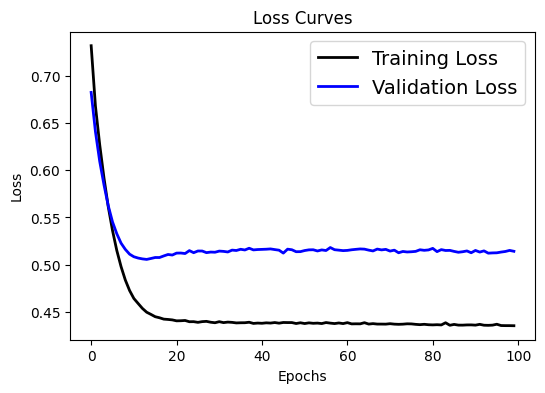

In [23]:
import matplotlib.pyplot as plt

# Plotting the loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)



#### Prédiction
Les valeurs sorties par le modèle sont des réels compris entre 0 et 1 (si vous utilisez la sigmoide). Or nous sohhatons avoir une valeur 1 ou 0 ?

5/5 [==============================] - 0s 12ms/step


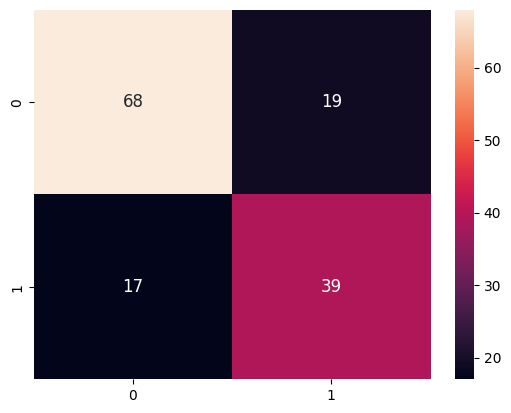

In [28]:
import numpy as np

# Obtenir les probabilités de prédiction
y_pred = model.predict(X_test)

# Convertir les probabilités en classes prédites en utilisant un seuil de décision de 0.5
y_classes = np.where(y_pred > 0.5, 1, 0)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_classes)

# Afficher la matrice de confusion sous forme de heatmap avec les annotations
sns.heatmap(cm, annot=True, annot_kws={"size": 12})

# Afficher le graphique
plt.show()

### Save History and model

In [ ]:
#Saving:



In [ ]:
#Loading:



### 6. Faire des prédictions

In [ ]:
#Small Sata set


In [ ]:
predictions = model.predict( my_data )
print("Prediction : {:.2f} K$".format(predictions[0][0]))
print("Reality    : {:.2f} K$".format(survived))


## Questions:
La suite du TP porte sur les données train.csv le fichier ci-dessous).
- Définir le modèle qui permet de trouver les meilleures Prédictions.

Je rappelle que la définition du modèle dépend :
- 1- l'architecture
- 2- l'optimiseur
- 3- l'entrainement

Faire varier ces différents paramètres.

<span style="color:green"> <strong>Le meilleur modèle sera récompensé.  
    <strong></span>


#### Saisir Ici la valeur de l'accuracy.
<span style="color:green"> Accuracy :  .....
  <strong></span>

In [ ]:
# Lecture du dataset n permet de limiter le nombre de lignes à lire
# Pour faciliter les tests
import pandas as pd
def load_data(n):
    data = pd.read_csv('../../data/train.csv')
    return data[0:n]

# le -1 du load_data(-1) veut dire on prend toutes les lignes
data=load_data(-1)
data.dropna(axis=0, inplace=True)
y = data['smoking'] # récupérer la colonne survived et la mettre dans y
# récuperer le reste des données dans X utiliser la fonction titanic.drop ???, ??? )
X = data.drop('smoking', axis=1)